In [122]:
import numpy as np
import matplotlib.pyplot as plt
from data import get_data, inspect_data, split_data

Dataset shape:
(392, 8)
Tail:
      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
393          82       1  
394          82       2  
395          82       1  
396          82       1  
397          82       1  
Statistics:
              count         mean         std     min       25%      50%  \
MPG           392.0    23.445918    7.805007     9.0    17.000    22.75   
Cylinders     392.0     5.471939    1.705783     3.0     4.000     4.00   
Displacement  392.0   194.411990  104.644004    68.0   105.000   151.00   
Horsepower    392.0   104.469388   38.491160    46.0    75.000    93.

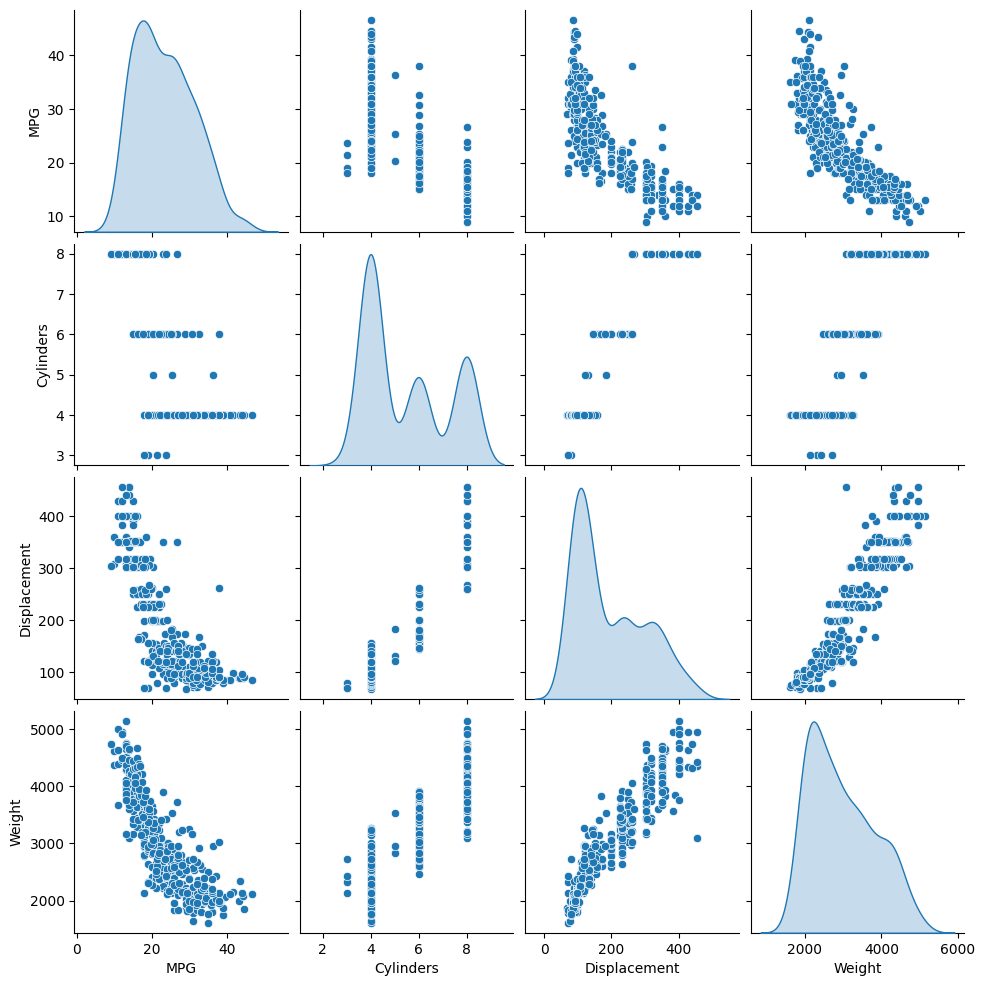

In [123]:
data = get_data()
inspect_data(data)

train_data, test_data = split_data(data)

In [124]:
# Simple Linear Regression
# predict MPG (y, dependent variable) using Weight (x, independent variable) using closed-form solution
# y = theta_0 + theta_1 * x - we want to find theta_0 and theta_1 parameters that minimize the prediction error

# We can calculate the error using MSE metric:
# MSE = SUM (from i=1 to n) (actual_output - predicted_output) ** 2

# get the columns
y_train = train_data['MPG'].to_numpy()
x_train = train_data['Weight'].to_numpy()

y_test = test_data['MPG'].to_numpy()
x_test = test_data['Weight'].to_numpy()

In [125]:
# TODO: calculate closed-form solution
x_train = x_train.reshape(-1, 1)
X = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
y_train = y_train.reshape(-1, 1)
# theta_best = np.linalg.inv(X.T @ X) @ (X.T @ y_train)
theta_best = np.linalg.solve(X.T @ X, X.T @ y_train)
# theta_best = [0, 0]

y_train_pred = X @ theta_best

x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
X_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
y_test_pred = X_test @ theta_best

In [126]:
# TODO: calculate error
def mse(y_pred, y):
    return np.mean((y_pred - y)**2)

mse_train = mse(y_train_pred, y_train)
mse_test = mse(y_test_pred, y_test)

print(f"{mse_train=}, {mse_test=}")


mse_train=np.float64(19.525262560353898), mse_test=np.float64(15.338692088640196)


/tmp/ipykernel_15562/669283611.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(theta_best[0]) + float(theta_best[1]) * x


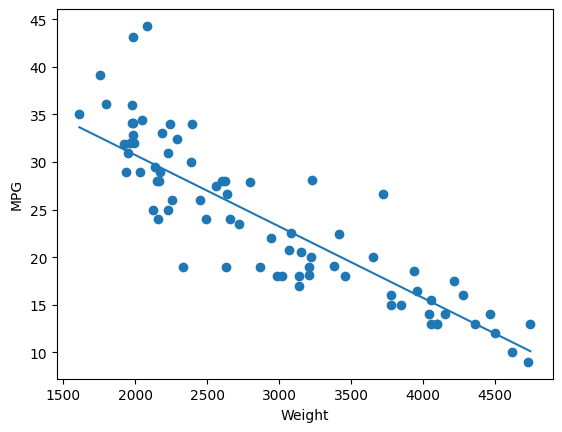

In [127]:
# plot the regression line
x = np.linspace(min(x_test), max(x_test), 100)
y = float(theta_best[0]) + float(theta_best[1]) * x
plt.plot(x, y)
plt.scatter(x_test, y_test)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

In [128]:
# TODO: standardization

xm = np.mean(X[:, 1])
xs = np.std(X[:, 1])

ym = np.mean(y_train) # średnia 
ys = np.std(y_train) # odchylenie standardowe

def standardize(x, m=None, s=None):

    if m is None:
        m = np.mean(x)
    if s is None:
        s = np.std(x)

    return (x-m)/s


X[:, 1] = standardize(X[:, 1])
X_test[:, 1] = standardize(X_test[:, 1])
y_train = standardize(y_train)

In [129]:
# TODO: calculate theta using Full-Batch Gradient Descent

eta = 0.1

theta = np.random.randn(2, 1)
m = X.shape[0]

for epoch in range(1000):
    y_train_pred = X @ theta
    grad = 2/m * X.T @ (y_train_pred - y_train)
    theta -= eta * grad
    if epoch % 20 == 0:
        print(mse(y_train_pred, y_train))

10.262502327900828
0.3292456532112043
0.32792529692507283
0.3279251214196189
0.3279251213962902
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.32792512139628704
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871


/tmp/ipykernel_15562/1778609563.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred = float(theta[0]) + float(theta[1]) * x


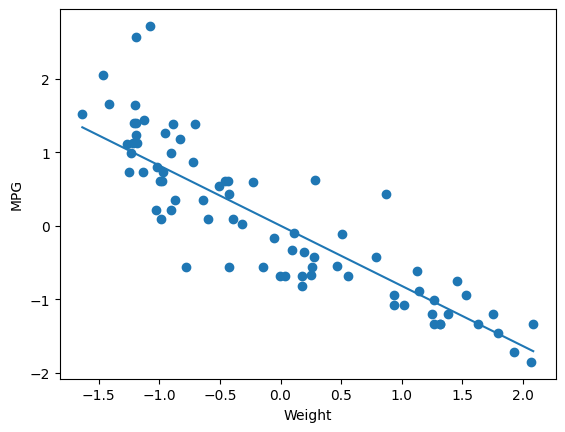

In [130]:
# plot the regression line
x = np.linspace(min(x_test), max(x_test), 100)
#y = float(theta[0]) + float(theta[1]) * x

x = standardize(x, m=xm, s=xs)
y_pred = float(theta[0]) + float(theta[1]) * x

x_test = standardize(x_test, m=xm, s=xs)
y_test = standardize(y_test, m=ym, s=ys)

plt.plot(x, y_pred)
plt.scatter(x_test, y_test)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

In [131]:
# TODO: calculate error
y_test_pred = X_test @ theta

mse_grad_train = mse(y_train_pred, y_train)
mse_grad_test = mse(y_test_pred, y_test)

print(f"{mse_grad_train=}, {mse_grad_test=}")

mse_grad_train=np.float64(0.3279251213962871), mse_grad_test=np.float64(0.2692042647048197)


In [132]:
# TODO: dodać jeszcze jeden czynnik (1/Waga), kolejną cechę i porównać błąd